### Readme
notebook que carga y analiza el fichero JSON con información de repositorios
los datos se han obtenido via API GraphQL y REST API de github

### Carga de librerías y fichero de datos. comprobaciones básicas

In [1]:
# imports de librerías requeridas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import json
from tabulate import tabulate
import locale

In [2]:
#pd.set_option('display.precision', 2)  # Configurar la precisión de decimales

# Configurar la visualización para que los números se muestren en formato europeo
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', 'X').replace('.', ',').replace('X', '.'))

In [3]:
DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\df_clean.json'

In [4]:
# Leer el archivo JSON y convertir las columnas de fecha
df = pd.read_json(DATA_FILE, orient='records', lines=True, convert_dates=['createdAt', 'pushedAt', 'updatedAt'])

In [5]:
df.head()

,name,description,stargazerCount,forkCount,createdAt,updatedAt,pushedAt,diskUsage,isArchived,isEmpty,...,forks,assignableUsers,deployments,environments,milestones,releases,pullRequests,watchers,reponame,language_count
0,Parsr,"Transforms PDF, Documents and Images into Enri...",5755,306,2019-08-05 12:43:53,2024-09-01 17:24:35,2023-12-03 13:27:21,55148,False,False,...,305,4,0,0,0,26,504,81,axa-group/Parsr,5
1,Yet-Another-EfficientDet-Pytorch,The pytorch re-implement of the official effic...,5200,1268,2020-04-06 03:27:06,2024-08-22 08:04:26,2021-10-24 02:13:31,9068,False,False,...,1251,1,0,0,0,4,37,108,zylo117/Yet-Another-EfficientDet-Pytorch,2
2,nit,Git of Web3 assets,4452,8,2022-04-20 08:21:14,2024-08-08 16:18:20,2024-07-29 14:17:11,548,False,False,...,8,4,0,0,0,4,13,12,numbersprotocol/nit,2
3,new.css,A classless CSS framework to write modern webs...,3946,127,2020-05-03 03:18:57,2024-09-01 17:29:23,2024-03-16 08:40:48,310,False,False,...,112,1,100,2,0,1,43,39,xz/new.css,2
4,golang-notes,Go source code analysis(zh-cn),3941,667,2018-04-04 05:21:51,2024-08-31 01:40:45,2022-07-18 09:30:00,8118,False,False,...,658,1,0,0,0,0,39,186,cch123/golang-notes,4


In [6]:
# crear copia de seguridad
df_copy=df.copy()

In [7]:
# Contar el número de columnas
num_columns = df_copy.shape[1]

print(f"El número de columnas en el DataFrame es: {num_columns}")

El número de columnas en el DataFrame es: 37


### Exploración

### Variables categóricas


In [8]:
df_copy['languages.nodes'].head(10)

0    [{'name': 'JavaScript'}, {'name': 'Shell'}, {'...
1    [{'name': 'Python'}, {'name': 'Jupyter Noteboo...
2     [{'name': 'JavaScript'}, {'name': 'TypeScript'}]
3                  [{'name': 'HTML'}, {'name': 'CSS'}]
4    [{'name': 'Go'}, {'name': 'HTML'}, {'name': 'S...
5              [{'name': 'Shell'}, {'name': 'Python'}]
6                       [{'name': 'Jupyter Notebook'}]
7    [{'name': 'Go'}, {'name': 'Makefile'}, {'name'...
8                                 [{'name': 'Python'}]
9                                 [{'name': 'Python'}]
Name: languages.nodes, dtype: object

In [9]:
# Identificar las columnas categóricas y booleanas
categorical_cols = df_copy.select_dtypes(include=['object']).columns
boolean_cols = df_copy.select_dtypes(include=['bool']).columns

print("Columnas categóricas (object):", categorical_cols, "número de categóricas: ", len(categorical_cols))
print("Columnas booleanas:", boolean_cols, "número de boolean: ", len(boolean_cols))


Columnas categóricas (object): Index(['name', 'description', 'owner.login', 'owner.url', 'licenseInfo.name',
       'primaryLanguage.name', 'languages.nodes', 'reponame'],
      dtype='object') número de categóricas:  8
Columnas booleanas: Index(['isArchived', 'isEmpty', 'isFork', 'isInOrganization', 'isPrivate',
       'isTemplate', 'hasIssuesEnabled', 'hasWikiEnabled',
       'hasProjectsEnabled', 'hasSponsorshipsEnabled', 'mergeCommitAllowed',
       'viewerCanSubscribe'],
      dtype='object') número de boolean:  12


In [10]:
# Resumen estadístico para las variables categóricas (de tipo object)
# Esto proporciona un resumen como conteo, número de valores únicos, valor más frecuente y su frecuencia
df_copy[categorical_cols].describe()

,name,description,owner.login,owner.url,licenseInfo.name,primaryLanguage.name,languages.nodes,reponame
count,37120,35030,37120,37120,28325,37120,37120,37120
unique,36186,34982,27486,27486,38,205,12654,37120
top,blog,A font file available from Google Fonts.,microsoft,https://github.com/microsoft,MIT License,Python,[{'name': 'Python'}],axa-group/Parsr
freq,20,5,195,195,14946,8522,3603,1


In [92]:
# Análisis de valores nulos en columnas categóricas
missing_categorical = df_copy[categorical_cols].isnull().sum()
print("Valores faltantes en variables categóricas:")
print(missing_categorical[missing_categorical > 0])


Valores faltantes en variables categóricas:
description         2090
licenseInfo.name    8795
dtype: int64


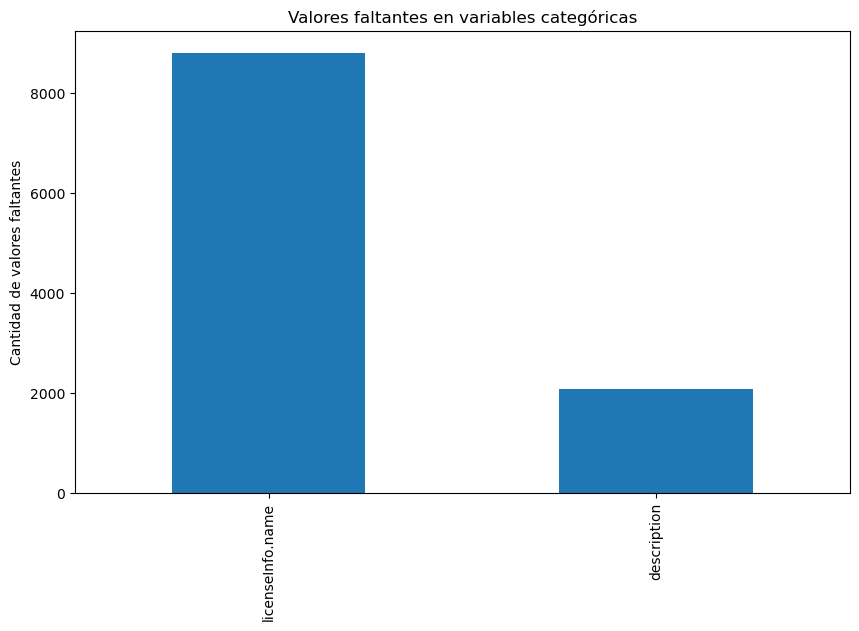

In [93]:
# Visualizar los valores faltantes con un gráfico de barras
plt.figure(figsize=(10, 6))
missing_categorical[missing_categorical > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Valores faltantes en variables categóricas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()


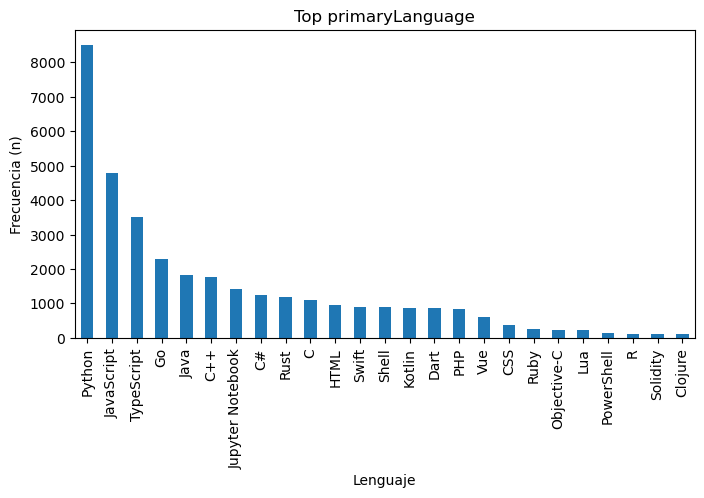

In [94]:
# Ejemplo de análisis detallado de una variable categórica específica
# Usaremos la columna 'primaryLanguage.name' para ver la distribución de los lenguajes primarios
plt.figure(figsize=(8, 4))
df_copy['primaryLanguage.name'].value_counts().head(25).plot(kind='bar')
plt.title('Top primaryLanguage')
plt.xlabel('Lenguaje')
plt.ylabel('Frecuencia (n)')
plt.show()


In [95]:
# Mostrar la cantidad de valores únicos para cada columna categórica
for col in categorical_cols:
    print(f"Columna: {col}")
    print(df_copy[col].value_counts().head(10))  # Mostrar los 10 valores más comunes
    print("\n")


Columna: name
name
blog        20
core        15
examples    14
dotfiles    13
leetcode    12
cli          9
website      7
ui           7
app          7
blogs        7
Name: count, dtype: int64


Columna: description
description
A font file available from Google Fonts.                                            5
Explore something new                                                               5
Created with CodeSandbox                                                            3
Migrated:                                                                           3
[ECCV 2018] AMC: AutoML for Model Compression and Acceleration on Mobile Devices    2
https://youtu.be/h-igXZCCrrc                                                        2
Superseded by https://github.com/ProtonVPN/ios-mac-app                              2
Home Assistant Configuration                                                        2
My neovim config                                                                  

### Var Boolean

In [96]:
# Resumen estadístico de las variables booleanas
df_copy[boolean_cols].describe()


,isArchived,isEmpty,isFork,isInOrganization,isPrivate,isTemplate,hasIssuesEnabled,hasWikiEnabled,hasProjectsEnabled,hasSponsorshipsEnabled,mergeCommitAllowed,viewerCanSubscribe
count,37120,37120,37120,37120,37120,37120,37120,37120,37120,37120,37120,37120
unique,2,1,1,2,1,2,2,2,2,2,2,1
top,False,False,False,False,False,False,True,True,True,False,True,True
freq,34116,37120,37120,24665,37120,36703,36223,30337,31923,32865,34123,37120


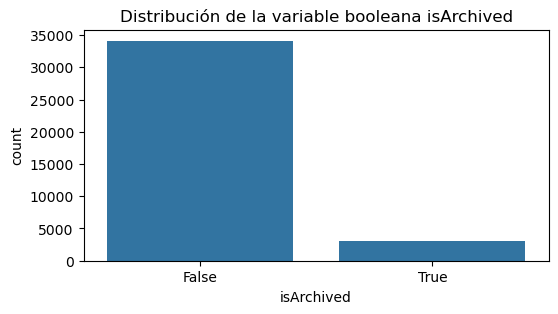

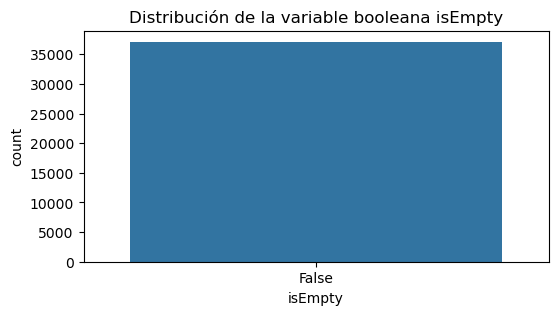

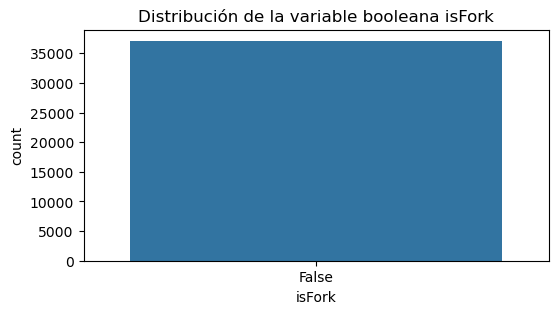

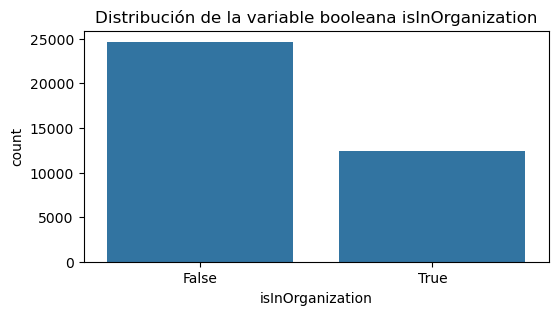

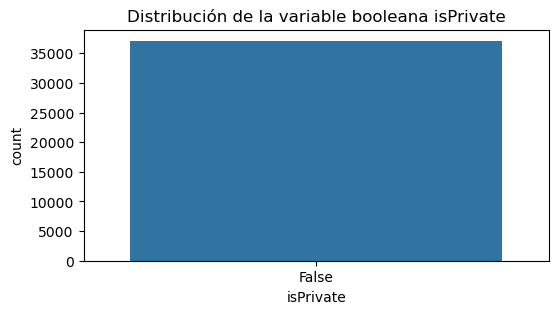

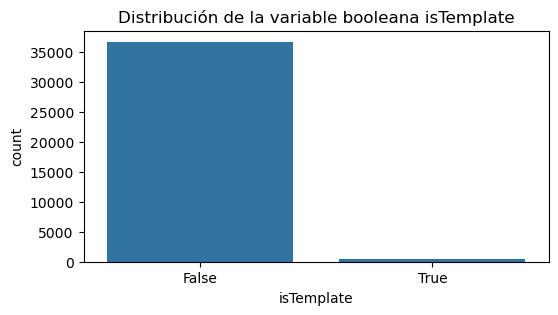

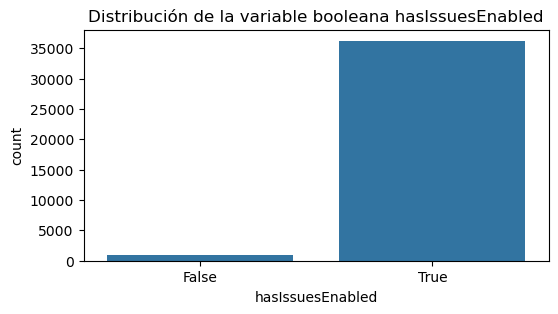

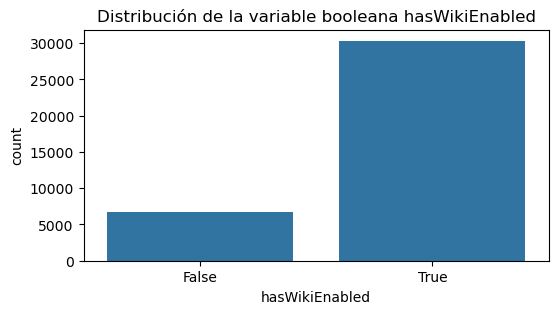

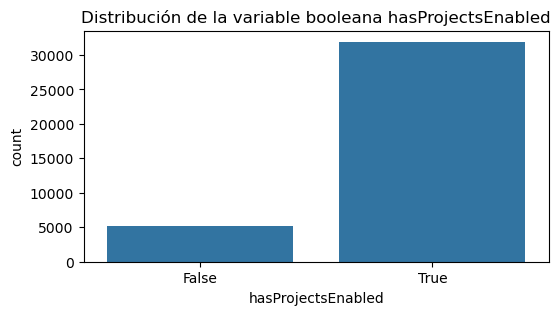

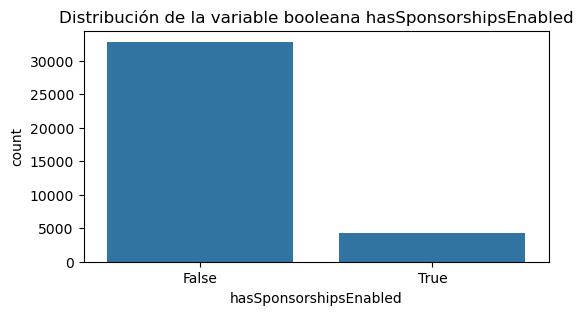

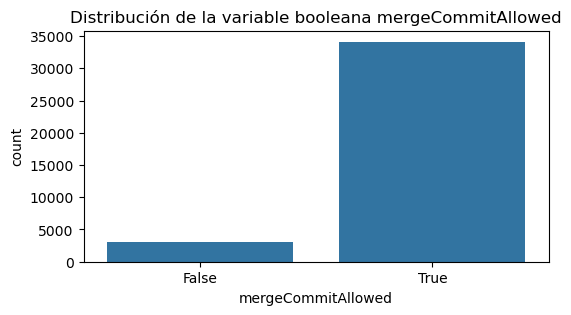

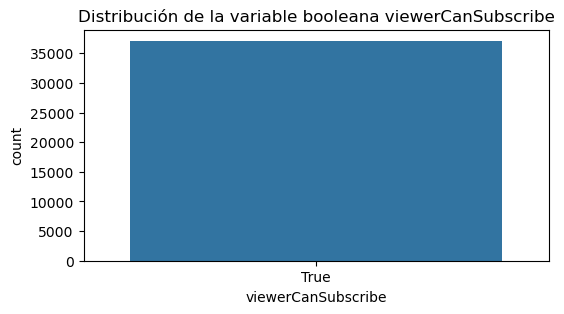

In [97]:
# Visualizar la distribución de cada variable booleana usando gráficos de barras
for col in boolean_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df_copy, x=col)
    plt.title(f"Distribución de la variable booleana {col}")
    plt.show()


In [98]:
# Columnas identificadas como arrays o diccionarios (ejemplo: 'languages.nodes')
complex_cols = ['languages.nodes']

# Para manejar estas columnas, podemos analizar la longitud de los arrays o la estructura de los diccionarios
for col in complex_cols:
    print(f"Análisis de la columna {col}:")
    # Mostrar un ejemplo del contenido
    print(df_copy[col].apply(lambda x: type(x)).value_counts())  # Tipo de los valores en la columna
    # Si contiene listas/arrays, podemos analizar la longitud de cada uno
    if isinstance(df_copy[col].iloc[0], list):
        print(df_copy[col].apply(len).describe())  # Resumen de las longitudes de los arrays
    print("\n")


Análisis de la columna languages.nodes:
languages.nodes
<class 'list'>    37120
Name: count, dtype: int64
count   37.120,00
mean         3,13
std          2,25
min          1,00
25%          1,00
50%          2,00
75%          4,00
max         10,00
Name: languages.nodes, dtype: float64




### Frecuencias absolutas y relativas

In [99]:
# Función para generar una tabla de frecuencias absolutas y relativas
def generar_tabla_frecuencias(df, col):
    # Frecuencia absoluta
    freq_abs = df[col].value_counts()
    
    # Frecuencia relativa
    freq_rel = df[col].value_counts(normalize=True) * 100
    
    # Combinar en una sola tabla
    tabla_frecuencias = pd.DataFrame({
        'Frecuencia_Absoluta': freq_abs,
        'Frecuencia_Relativa (%)': freq_rel
    })
    
    return tabla_frecuencias

# Generar y mostrar tablas para cada variable categórica
for col in categorical_cols:
    #print(f"{col}")
    print(generar_tabla_frecuencias(df_copy, col))
    print("\n")


                                      Frecuencia_Absoluta  \
name                                                        
blog                                                   20   
core                                                   15   
examples                                               14   
dotfiles                                               13   
leetcode                                               12   
...                                                   ...   
jsoncat                                                 1   
hy-react-web-music                                      1   
Semantic-Segmentation-Loss-Functions                    1   
docbao                                                  1   
JavaScript-Is-Weird                                     1   

                                      Frecuencia_Relativa (%)  
name                                                           
blog                                                     0,05  
core          

In [100]:
# Generar y mostrar tablas de frecuencias para las variables booleanas
for col in boolean_cols:
    #print(f"{col}")
    print(generar_tabla_frecuencias(df_copy, col))
    print("\n")


            Frecuencia_Absoluta  Frecuencia_Relativa (%)
isArchived                                              
False                     34116                    91,91
True                       3004                     8,09


         Frecuencia_Absoluta  Frecuencia_Relativa (%)
isEmpty                                              
False                  37120                   100,00


        Frecuencia_Absoluta  Frecuencia_Relativa (%)
isFork                                              
False                 37120                   100,00


                  Frecuencia_Absoluta  Frecuencia_Relativa (%)
isInOrganization                                              
False                           24665                    66,45
True                            12455                    33,55


           Frecuencia_Absoluta  Frecuencia_Relativa (%)
isPrivate                                              
False                    37120                   100,00


            Frecuenci

In [101]:
# Comprobando información de los registros para los casos donde las variables booleanas muestran valores en TRUE y FALSE
# Selección manual de booleanas en base al resultado anterior


# Variables booleanas relevantes. Selección manual
boolean_cols_relevantes = ['isInOrganization', 'hasWikiEnabled', 'hasProjectsEnabled', 'hasSponsorshipsEnabled']

# Variables numéricas de interés. Selección manual
variables_numericas = ['contributors', 'assignableUsers', 'deployments', 
                       'environments', 'milestones', 'releases', 'language_count']

# Mostrar estadísticas descriptivas para las variables numéricas filtradas por cada columna booleana
for col in boolean_cols_relevantes:
    print(f"Estadísticas descriptivas para las variables numéricas cuando {col} es True:")
    stats_true = df_copy[df_copy[col] == True][variables_numericas].describe()
    print(stats_true)
    print("\n")

    print(f"Estadísticas descriptivas para las variables numéricas cuando {col} es False:")
    stats_false = df_copy[df_copy[col] == False][variables_numericas].describe()
    print(stats_false)
    print("\n")

Estadísticas descriptivas para las variables numéricas cuando isInOrganization es True:
       contributors  assignableUsers.totalCount  deployments.totalCount  \
count     12.455,00                   12.455,00               12.455,00   
mean          16,93                       34,79                  139,38   
std           22,83                      218,51                1.641,80   
min            0,00                        0,00                    0,00   
25%            3,00                        2,00                    0,00   
50%            8,00                        4,00                    0,00   
75%           20,00                       10,00                    0,00   
max          100,00                    2.267,00               95.326,00   

       environments.totalCount  milestones.totalCount  releases.totalCount  \
count                12.455,00              12.455,00            12.455,00   
mean                      1,51                   1,58                18,60   
st


### Comparación para isInOrganization ###

Diferencia en medias (True - False):
contributors                 2,68
assignableUsers.totalCount   1,77
deployments.totalCount       0,00
environments.totalCount      0,00
milestones.totalCount        0,00
releases.totalCount          0,39
language_count               0,52
dtype: float64

t-test para contributors: t-stat=31.103, p-value=0.000
t-test para assignableUsers.totalCount: t-stat=56.759, p-value=0.000
t-test para deployments.totalCount: t-stat=nan, p-value=nan
t-test para environments.totalCount: t-stat=nan, p-value=nan
t-test para milestones.totalCount: t-stat=nan, p-value=nan
t-test para releases.totalCount: t-stat=5.269, p-value=0.000
t-test para language_count: t-stat=15.692, p-value=0.000


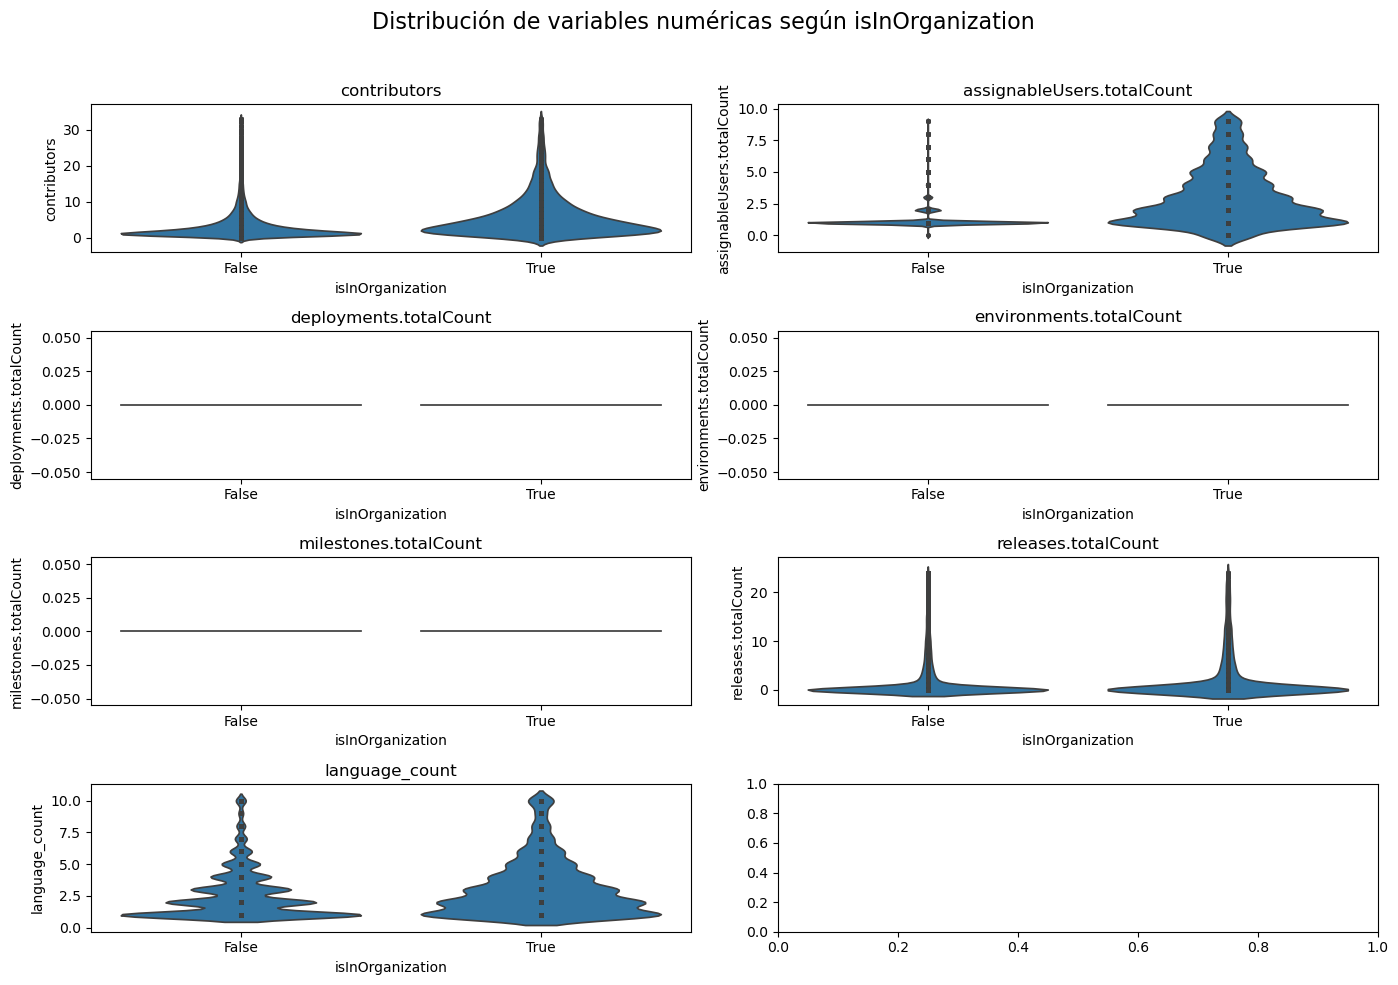


### Comparación para hasWikiEnabled ###

Diferencia en medias (True - False):
contributors                 -2,10
assignableUsers.totalCount   -0,38
deployments.totalCount        0,00
environments.totalCount       0,00
milestones.totalCount         0,00
releases.totalCount          -1,78
language_count                0,01
dtype: float64

t-test para contributors: t-stat=-18.447, p-value=0.000
t-test para assignableUsers.totalCount: t-stat=-10.754, p-value=0.000
t-test para deployments.totalCount: t-stat=nan, p-value=nan
t-test para environments.totalCount: t-stat=nan, p-value=nan
t-test para milestones.totalCount: t-stat=nan, p-value=nan
t-test para releases.totalCount: t-stat=-16.230, p-value=0.000
t-test para language_count: t-stat=0.365, p-value=0.715


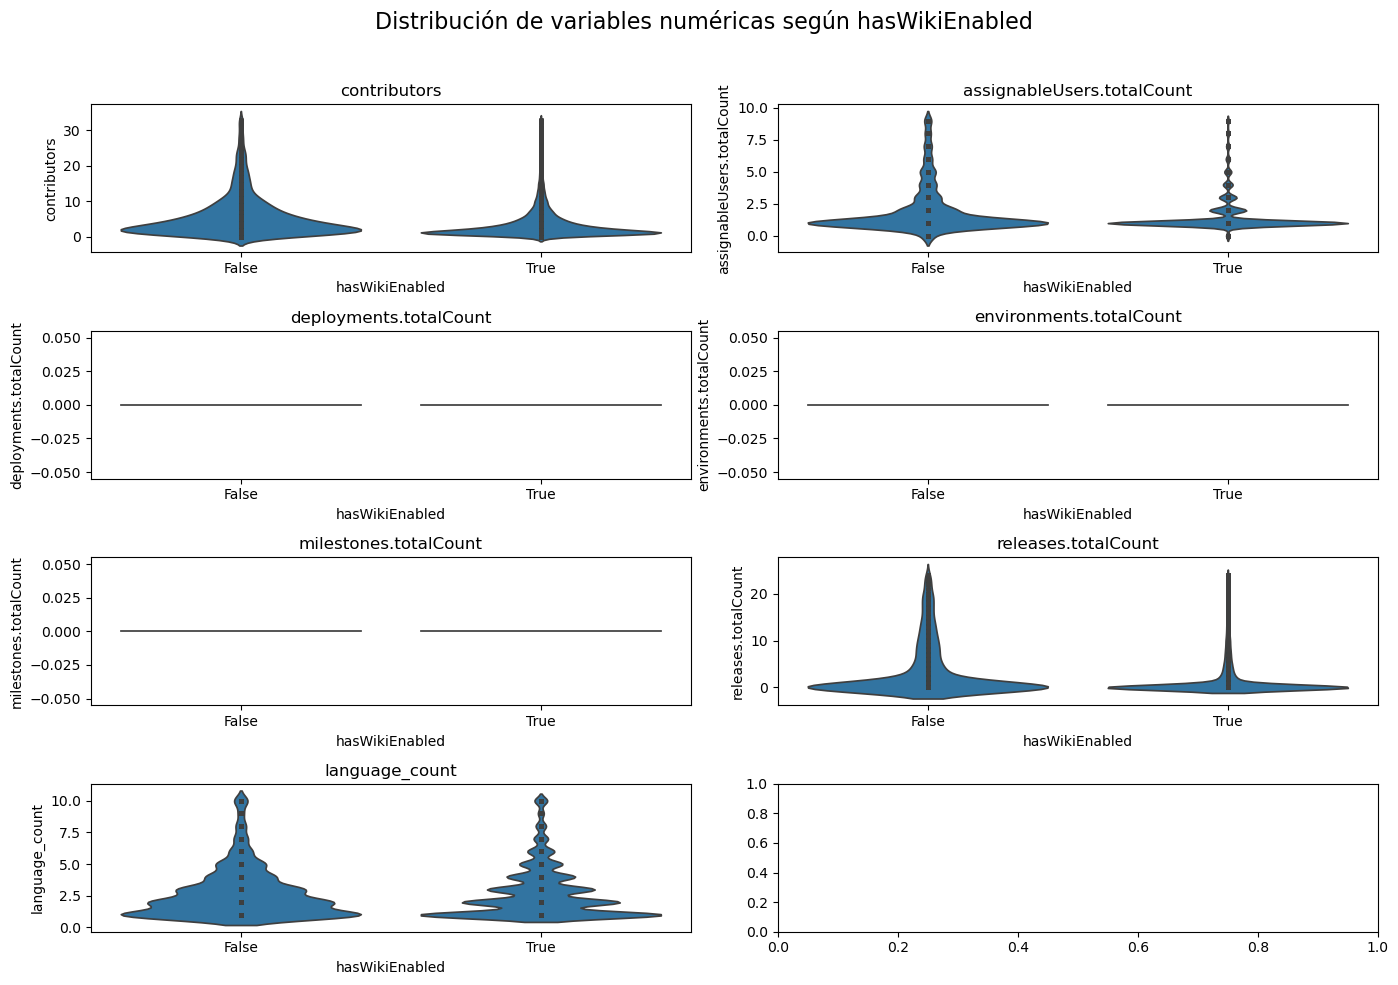


### Comparación para hasProjectsEnabled ###

Diferencia en medias (True - False):
contributors                 -2,40
assignableUsers.totalCount   -0,42
deployments.totalCount        0,00
environments.totalCount       0,00
milestones.totalCount         0,00
releases.totalCount          -2,22
language_count                0,06
dtype: float64

t-test para contributors: t-stat=-18.182, p-value=0.000
t-test para assignableUsers.totalCount: t-stat=-10.425, p-value=0.000
t-test para deployments.totalCount: t-stat=nan, p-value=nan
t-test para environments.totalCount: t-stat=nan, p-value=nan
t-test para milestones.totalCount: t-stat=nan, p-value=nan
t-test para releases.totalCount: t-stat=-17.444, p-value=0.000
t-test para language_count: t-stat=1.538, p-value=0.124


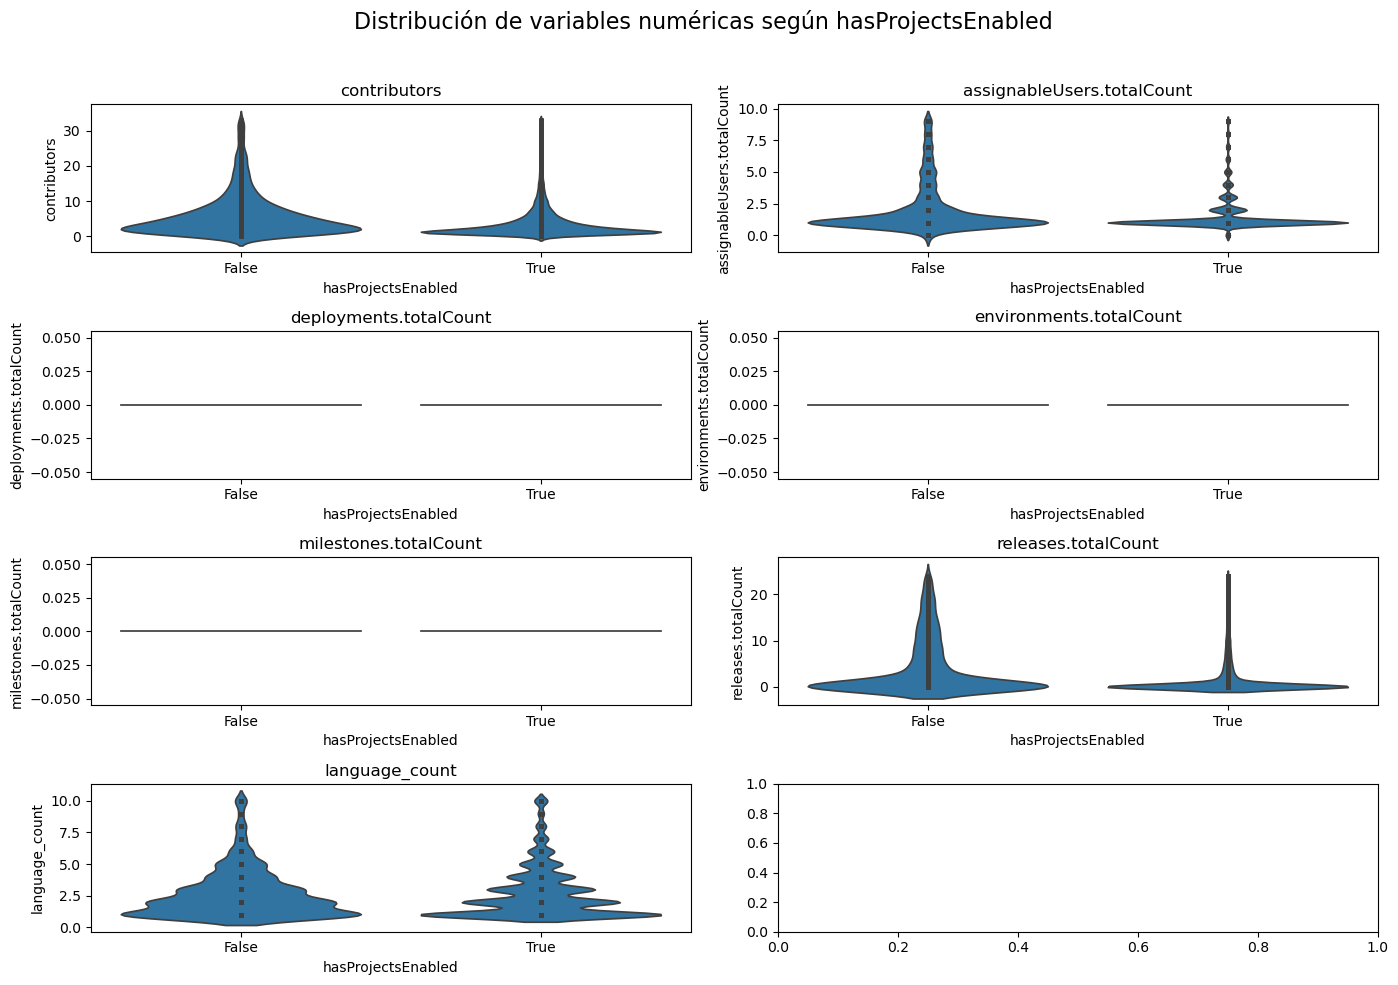


### Comparación para hasSponsorshipsEnabled ###

Diferencia en medias (True - False):
contributors                  2,33
assignableUsers.totalCount   -0,16
deployments.totalCount        0,00
environments.totalCount       0,00
milestones.totalCount         0,00
releases.totalCount           2,79
language_count                0,13
dtype: float64

t-test para contributors: t-stat=15.469, p-value=0.000
t-test para assignableUsers.totalCount: t-stat=-4.878, p-value=0.000
t-test para deployments.totalCount: t-stat=nan, p-value=nan
t-test para environments.totalCount: t-stat=nan, p-value=nan
t-test para milestones.totalCount: t-stat=nan, p-value=nan
t-test para releases.totalCount: t-stat=18.072, p-value=0.000
t-test para language_count: t-stat=2.507, p-value=0.012


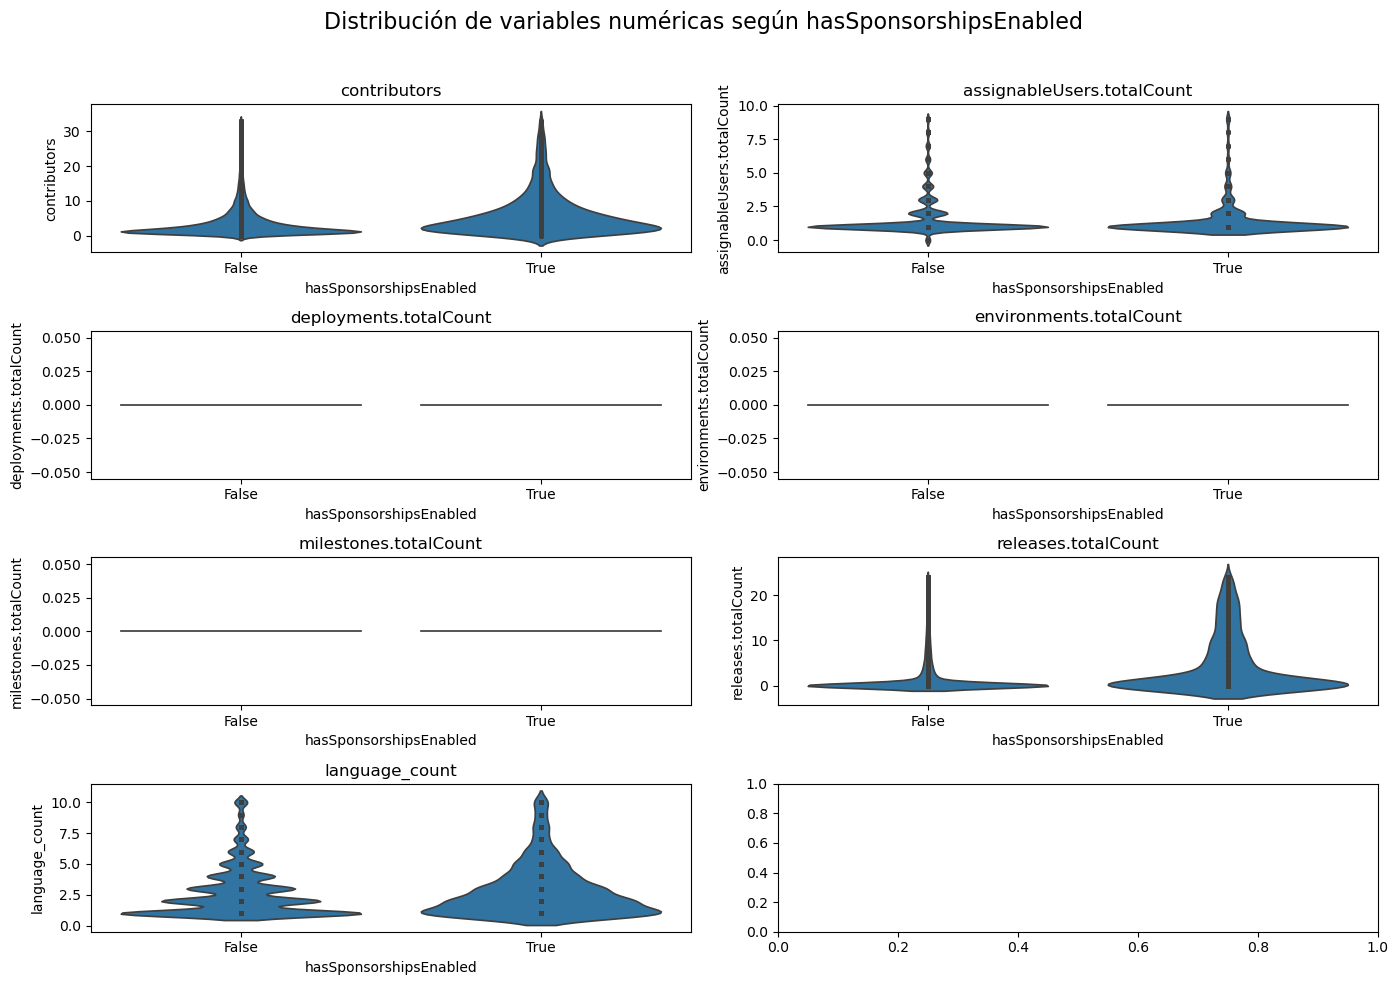

In [132]:
# intentando obtener mejor información de la relación entre booleans y numéricas
# eliminado outliers
from scipy.stats import ttest_ind

# Variables booleanas relevantes
boolean_cols_relevantes = ['isInOrganization', 'hasWikiEnabled', 'hasProjectsEnabled', 'hasSponsorshipsEnabled']

# Variables numéricas de interés
variables_numericas = ['contributors', 'assignableUsers', 'deployments', 
                       'environments', 'milestones', 'releases', 'language_count']

# límite de outliers
LIM = 3

# Función para eliminar outliers usando el rango intercuartílico (IQR)
def eliminar_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df_filtrado = df[~((df[cols] < (Q1 - LIM * IQR)) | (df[cols] > (Q3 + LIM * IQR))).any(axis=1)]
    return df_filtrado

# Eliminar outliers en las variables numéricas
df_filtrado = eliminar_outliers(df_copy, variables_numericas)

# Comparación de estadísticas y visualización
for col in boolean_cols_relevantes:
    print(f"\n### Comparación para {col} ###\n")
    
    # Filtrar datos por True/False
    df_true = df_filtrado[df_filtrado[col] == True][variables_numericas]
    df_false = df_filtrado[df_filtrado[col] == False][variables_numericas]
    
    # Estadísticas descriptivas clave
    mean_diff = df_true.mean() - df_false.mean()
    print(f"Diferencia en medias (True - False):\n{mean_diff}\n")
    
    # Realizar t-test para evaluar diferencias significativas en las medias
    for num_col in variables_numericas:
        t_stat, p_val = ttest_ind(df_true[num_col].dropna(), df_false[num_col].dropna(), equal_var=False)
        print(f"t-test para {num_col}: t-stat={t_stat:.3f}, p-value={p_val:.3f}")
    
    # Graficar en un grid de 2 columnas usando violin plots para visualizar mejor la distribución
    fig, axes = plt.subplots(nrows=(len(variables_numericas) + 1) // 2, ncols=2, figsize=(14, 10))
    fig.suptitle(f"Distribución de variables numéricas según {col}", fontsize=16)
    
    for i, num_col in enumerate(variables_numericas):
        row, col_pos = divmod(i, 2)
        
        # Verificar si hay datos para True y False antes de graficar
        if not df_true.empty and not df_false.empty:
            sns.violinplot(data=df_filtrado, x=col, y=num_col, ax=axes[row, col_pos], inner="point", density_norm='width')
            axes[row, col_pos].set_title(f"{num_col}")
        else:
            axes[row, col_pos].set_title(f"{num_col} - Sin datos suficientes")
            axes[row, col_pos].text(0.5, 0.5, 'Sin datos suficientes', horizontalalignment='center', verticalalignment='center', fontsize=12)

    # Ajustar diseño de las gráficas
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Dejar espacio para el título
    plt.show()


In [130]:
df_true['milestones'].empty

False

In [ ]:
df_filtrado

In [102]:
print(df_copy['isInOrganization'].isnull().sum())
print(df_copy['isInOrganization'].dtype)
print(df_copy['isInOrganization'].unique())
# Convertir la columna a tipo booleano si es necesario
#df_copy['isInOrganization'] = df_copy['isInOrganization'].astype(bool)

0
bool
[ True False]


### Relación entre variables, correlación, etc.

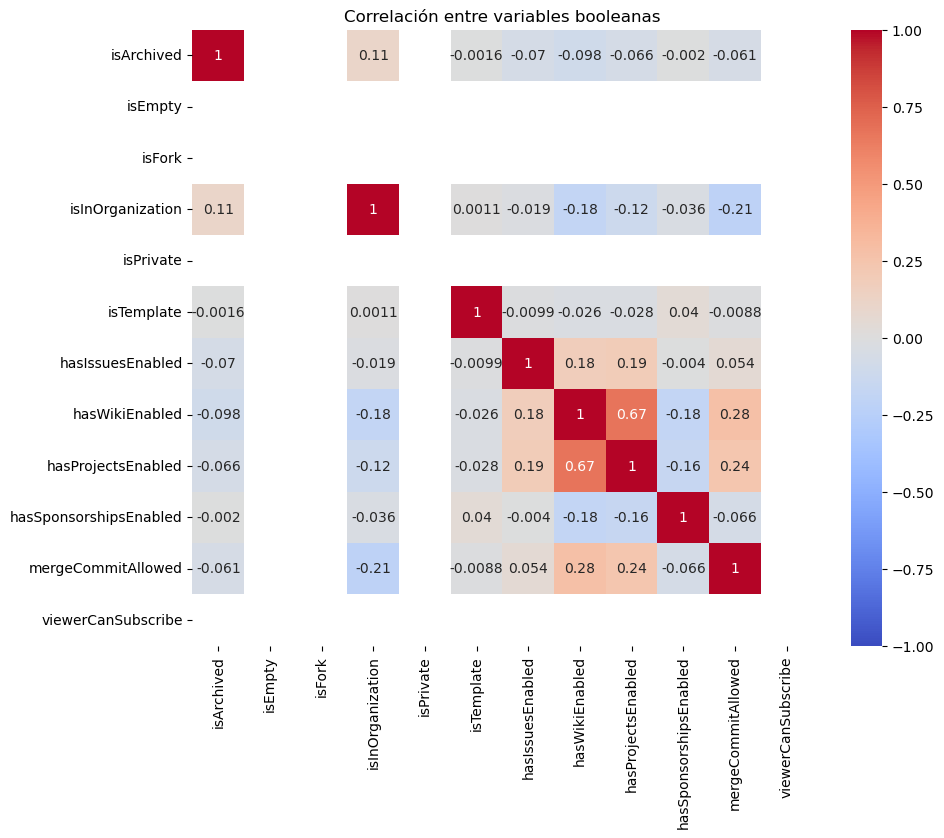

In [104]:
# Calcular la matriz de correlación entre las variables booleanas
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy[boolean_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre variables booleanas')
plt.show()


## Observando alguna variable por separado

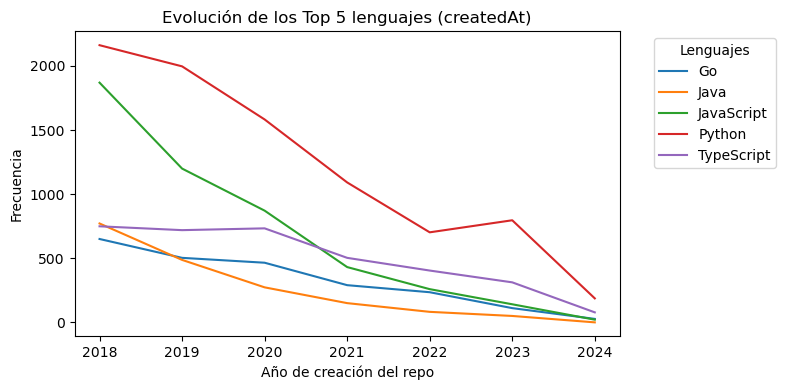

In [105]:
# Lenaguajes vs fecha de creación. Evolución de los Top 5



# Convertir la columna 'createdAt' a solo el año
df_copy['year'] = df_copy['createdAt'].dt.year

# Obtener los 5 lenguajes más comunes
top_5_languages = df_copy['primaryLanguage.name'].value_counts().nlargest(5).index

# Filtrar solo los repositorios con esos 5 lenguajes
df_top_5_languages = df_copy[df_copy['primaryLanguage.name'].isin(top_5_languages)]

# Agrupar por año y lenguaje, y contar el número de repos creados en cada combinación
repos_por_año = df_top_5_languages.groupby(['year', 'primaryLanguage.name']).size().unstack(fill_value=0)

# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))
repos_por_año.plot(kind='line', ax=plt.gca())

# Añadir etiquetas y título
plt.title('Evolución de los Top 5 lenguajes (createdAt)')
plt.xlabel('Año de creación del repo')
plt.ylabel('Frecuencia')
plt.legend(title='Lenguajes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


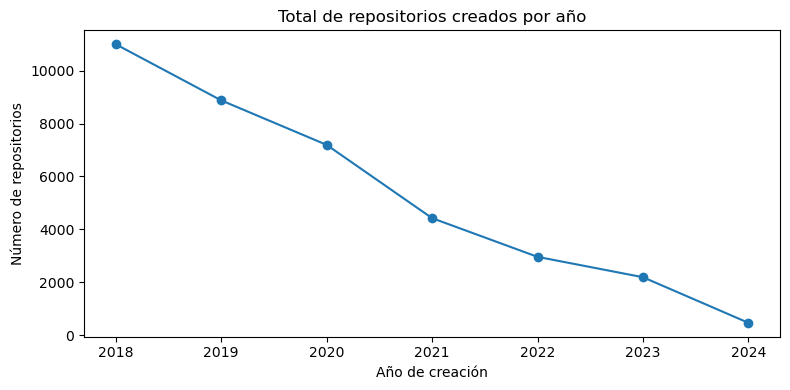

In [106]:
# Contar el número total de repositorios creados por año
repos_totales_por_año = df_copy.groupby('year').size()

# Crear el gráfico del número total de repositorios creados por año
plt.figure(figsize=(8, 4))
repos_totales_por_año.plot(kind='line', marker='o')

# Añadir etiquetas y título
plt.title('Total de repositorios creados por año')
plt.xlabel('Año de creación')
plt.ylabel('Número de repositorios')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


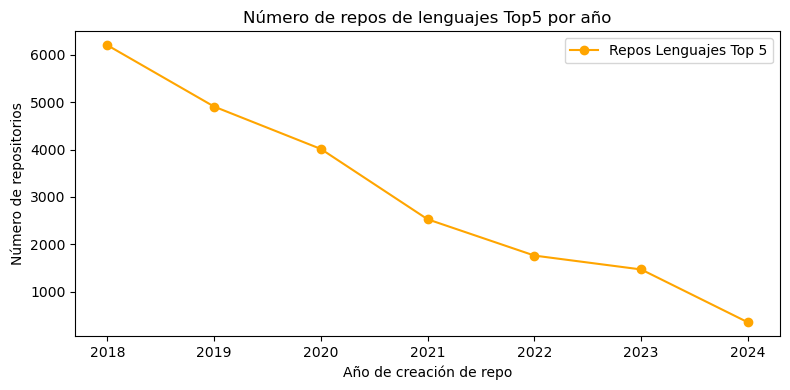

In [107]:
# Crear un dataframe para almacenar el top 5 lenguajes por cada año
top_5_lenguajes_por_año = df_copy.groupby(['year', 'primaryLanguage.name']).size().unstack(fill_value=0)

# Para cada año, obtener el top 5 lenguajes más utilizados
top_5_años_lenguajes = top_5_lenguajes_por_año.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

# Crear una tabla para mostrar cuántos repos se crean de lenguajes top 5 cada año
repos_top_5_por_año = top_5_lenguajes_por_año.apply(lambda row: row[top_5_años_lenguajes.loc[row.name]].sum(), axis=1)

# Crear el gráfico del número total de repos de lenguajes top 5 por año
plt.figure(figsize=(8, 4))
repos_top_5_por_año.plot(kind='line', marker='o', color='orange', label='Repos Lenguajes Top 5')

# Añadir etiquetas y título
plt.title('Número de repos de lenguajes Top5 por año')
plt.xlabel('Año de creación de repo')
plt.ylabel('Número de repositorios')

# Mostrar el gráfico
plt.tight_layout()
plt.legend()
plt.show()


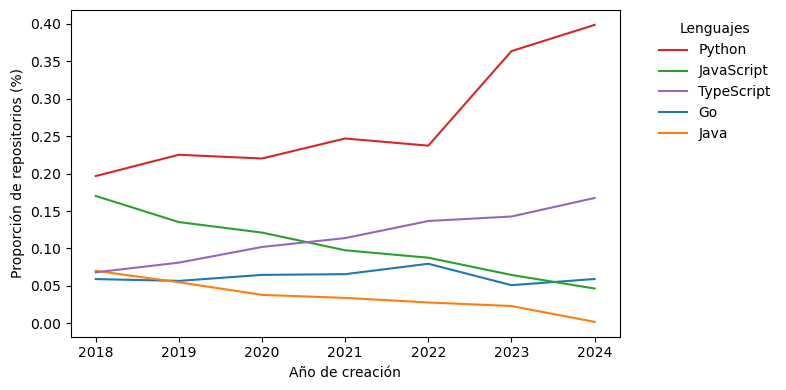

In [108]:
# Frecuencia relativa de los TOP5 lenguajes
# Normalizando dividiendo por el total de cada año


import matplotlib.pyplot as plt

# Convertir la columna 'createdAt' a solo el año
df_copy['year'] = df_copy['createdAt'].dt.year

# Obtener los 5 lenguajes más comunes
top_5_languages = df_copy['primaryLanguage.name'].value_counts().nlargest(5).index

# Filtrar solo los repositorios con esos 5 lenguajes
df_top_5_languages = df_copy[df_copy['primaryLanguage.name'].isin(top_5_languages)]

# Agrupar por año y lenguaje, y contar el número de repos creados en cada combinación
repos_por_año = df_top_5_languages.groupby(['year', 'primaryLanguage.name']).size().unstack(fill_value=0)

# Obtener el número total de repositorios creados por año
repos_totales_por_año = df_copy.groupby('year').size()

# Normalizar las frecuencias de los lenguajes, dividiendo por el total de repos creados en cada año
repos_por_año_relativo = repos_por_año.div(repos_totales_por_año, axis=0)

# Crear el gráfico de líneas con frecuencias relativas
plt.figure(figsize=(8, 4))

# Trazar las líneas
ax = repos_por_año_relativo.plot(kind='line', ax=plt.gca())

# Añadir etiquetas y título
#plt.title('Evolución relativa de los top 5 lenguajes por año de creación de repos')
plt.xlabel('Año de creación')
plt.ylabel('Proporción de repositorios (%)')

# Obtener el orden correcto de la leyenda basado en las líneas trazadas
handles, labels = ax.get_legend_handles_labels()

# Crear un nuevo orden para la leyenda basado en el orden de las líneas
order = [3, 2, 4, 0, 1] # Ajusta esto si el orden de las líneas cambia
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Lenguajes', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()






## Relación entre variables

In [109]:
# Relación entre variables

from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Variables de interés
variables = ['hasProjectsEnabled', 'primaryLanguage.name', 'isInOrganization', 'hasWikiEnabled', 'hasSponsorshipsEnabled', 'mergeCommitAllowed']

# Codificar la variable categórica primaryLanguage.name con LabelEncoder
df_copy_encoded = df_copy.copy()
label_encoder = LabelEncoder()
df_copy_encoded['primaryLanguage.name'] = label_encoder.fit_transform(df_copy_encoded['primaryLanguage.name'])

# 1. Tablas de contingencia
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            contingency_table = pd.crosstab(df_copy_encoded[var1], df_copy_encoded[var2])
            print(f"\nTabla de contingencia entre {var1} y {var2}:\n", contingency_table)

# 2. Prueba de Chi-cuadrado
def chi2_test(var1, var2):
    contingency_table = pd.crosstab(df_copy_encoded[var1], df_copy_encoded[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            chi2, p = chi2_test(var1, var2)
            print(f"\nChi-cuadrado entre {var1} y {var2}: Chi2 = {chi2:.4f}, p-valor = {p:.4f}")

# 3. Cálculo de Cramér's V
def cramers_v(var1, var2):
    contingency_table = pd.crosstab(df_copy_encoded[var1], df_copy_encoded[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            v = cramers_v(var1, var2)
            print(f"\nCramér's V entre {var1} y {var2}: {v:.4f}")

# 4. Correlación para variables booleanas
boolean_vars = ['hasProjectsEnabled', 'isInOrganization', 'hasWikiEnabled', 'hasSponsorshipsEnabled', 'mergeCommitAllowed']
correlation_matrix = df_copy_encoded[boolean_vars].corr()



Tabla de contingencia entre hasProjectsEnabled y primaryLanguage.name:
 primaryLanguage.name  0    1    2    3    4    5    6    7    8    9    ...  \
hasProjectsEnabled                                                      ...   
False                   1    0    0    1    2    1    0    0    0    1  ...   
True                    0    1    5    0    9    1    1    2    2    1  ...   

primaryLanguage.name  195  196  197  198  199  200  201  202  203  204  
hasProjectsEnabled                                                      
False                   0    0    0    0    0    1    4    1    0    0  
True                    1    1    2    4    1    1   13    1    1    1  

[2 rows x 205 columns]

Tabla de contingencia entre hasProjectsEnabled y isInOrganization:
 isInOrganization    False  True 
hasProjectsEnabled              
False                2728   2469
True                21937   9986

Tabla de contingencia entre hasProjectsEnabled y hasWikiEnabled:
 hasWikiEnabled      False 

In [110]:
# Validad supuestos adecuados para chi2

# Variables a analizar
variables = [
    'hasProjectsEnabled',
    'isInOrganization',
    'hasSponsorshipsEnabled',
    'primaryLanguage.name',
    'mergeCommitAllowed',
    'hasWikiEnabled'
]

# Función para verificar los supuestos
def verificar_supuestos_resumido(df, vars):
    resultados = []  # Lista para almacenar resultados

    for i in range(len(vars)):
        for j in range(i + 1, len(vars)):
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[vars[i]], df[vars[j]])
            
            # Calcular chi-cuadrado
            chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
            
            # Verificación de los supuestos
            cumple_supuestos = np.all(expected >= 1) and np.sum(expected < 5) <= 0.2 * expected.size
            
            # Almacenar resultado
            resultados.append({
                'Variable 1': vars[i],
                'Variable 2': vars[j],
                'Estadístico chi-cuadrado': chi2,
                'p-valor': p,
                'Cumple supuestos': cumple_supuestos
            })
    
    # Crear un DataFrame de resultados
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

# Ejecutar la función y mostrar resultados resumidos
resultados_resumidos = verificar_supuestos_resumido(df_copy, variables)
print(resultados_resumidos)


                Variable 1              Variable 2  Estadístico chi-cuadrado  \
0       hasProjectsEnabled        isInOrganization                    527,11   
1       hasProjectsEnabled  hasSponsorshipsEnabled                    994,91   
2       hasProjectsEnabled    primaryLanguage.name                  1.173,45   
3       hasProjectsEnabled      mergeCommitAllowed                  2.136,77   
4       hasProjectsEnabled          hasWikiEnabled                 16.482,50   
5         isInOrganization  hasSponsorshipsEnabled                     47,24   
6         isInOrganization    primaryLanguage.name                  1.130,95   
7         isInOrganization      mergeCommitAllowed                  1.700,15   
8         isInOrganization          hasWikiEnabled                  1.199,49   
9   hasSponsorshipsEnabled    primaryLanguage.name                  1.123,20   
10  hasSponsorshipsEnabled      mergeCommitAllowed                    160,68   
11  hasSponsorshipsEnabled          hasW

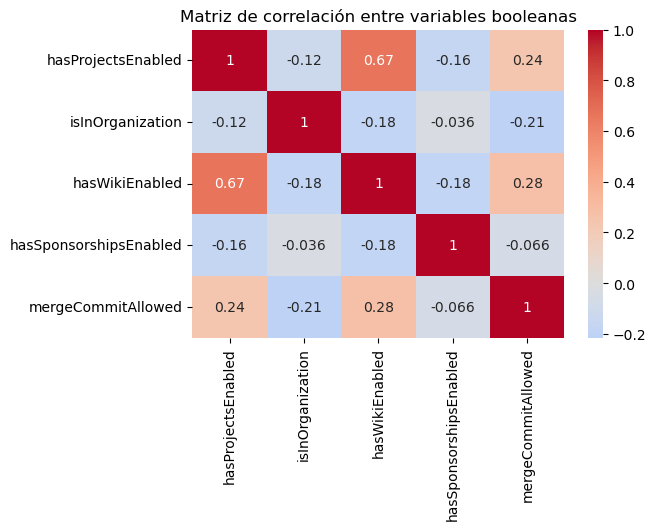

In [111]:
# Mostrar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables booleanas')
plt.show()

In [112]:
# prueba de permutación 
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Función para realizar la prueba de permutación
def permutation_test(data, var1, var2, num_permutations=1000):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data[var1], data[var2])
    observed_stat = chi2_contingency(contingency_table)[0]
    
    # Concatenar las dos columnas para permutar
    combined = np.concatenate([data[var1].values, data[var2].values])
    count = 0
    
    for _ in range(num_permutations):
        # Mezclar las etiquetas
        np.random.shuffle(combined)
        # Crear nuevas columnas permutadas
        new_var1 = combined[:len(data[var1])]
        new_var2 = combined[len(data[var1]):]
        
        # Calcular la tabla de contingencia
        new_contingency_table = pd.crosstab(new_var1, new_var2)
        new_stat = chi2_contingency(new_contingency_table)[0]
        
        # Contar cuántas veces la estadística permutada es mayor o igual a la observada
        if new_stat >= observed_stat:
            count += 1
    
    # Calcular el valor p
    p_value = count / num_permutations
    return observed_stat, p_value

# Suponiendo que df_copy_encoded es tu DataFrame con las variables codificadas
variables_of_interest = [
    ('hasProjectsEnabled', 'primaryLanguage.name'),
    ('isInOrganization', 'primaryLanguage.name'),
    ('hasSponsorshipsEnabled', 'primaryLanguage.name'),
    ('primaryLanguage.name', 'mergeCommitAllowed'),
    ('primaryLanguage.name', 'hasWikiEnabled')
]

# Realizar las pruebas de permutación
for var1, var2 in variables_of_interest:
    observed_stat, p_value = permutation_test(df_copy_encoded, var1, var2)
    print(f'Prueba de permutación entre {var1} y {var2}: Estadística observada = {observed_stat:.4f}, p-valor = {p_value:.4f}')


Prueba de permutación entre hasProjectsEnabled y primaryLanguage.name: Estadística observada = 1173.4493, p-valor = 1.0000
Prueba de permutación entre isInOrganization y primaryLanguage.name: Estadística observada = 1130.9514, p-valor = 1.0000
Prueba de permutación entre hasSponsorshipsEnabled y primaryLanguage.name: Estadística observada = 1123.1988, p-valor = 1.0000
Prueba de permutación entre primaryLanguage.name y mergeCommitAllowed: Estadística observada = 1366.6980, p-valor = 1.0000
Prueba de permutación entre primaryLanguage.name y hasWikiEnabled: Estadística observada = 1143.2933, p-valor = 1.0000


In [113]:
# prueba de bootstraping para observar la variabilidad de una estadística


# Variables a analizar
variables = [
    'hasProjectsEnabled',
    'isInOrganization',
    'hasSponsorshipsEnabled',
    'primaryLanguage.name',
    'mergeCommitAllowed',
    'hasWikiEnabled'
]

# Función de bootstrapping
def bootstrap(data, num_samples=1000):
    # Almacena las medias de las muestras bootstrap
    boot_means = []
    
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)  # Muestra con reemplazo
        boot_means.append(np.mean(sample))
        
    return boot_means

# Datos de ejemplo
#data = df_copy_encoded['hasProjectsEnabled']  # Cambia esto por tus datos

for var in variables:
    data = df_copy_encoded[var]
    # Ejecutar bootstrapping
    boot_means = bootstrap(data, num_samples=1000)

    # Calcular el intervalo de confianza del 95%
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)
    
    print(f'Intervalo de confianza del 95% para la media de {var}: ({lower_bound:.4f}, {upper_bound:.4f})')


Intervalo de confianza del 95% para la media de hasProjectsEnabled: (0.8565, 0.8635)
Intervalo de confianza del 95% para la media de isInOrganization: (0.3307, 0.3405)
Intervalo de confianza del 95% para la media de hasSponsorshipsEnabled: (0.1114, 0.1178)
Intervalo de confianza del 95% para la media de primaryLanguage.name: (106.7311, 107.7422)
Intervalo de confianza del 95% para la media de mergeCommitAllowed: (0.9162, 0.9221)
Intervalo de confianza del 95% para la media de hasWikiEnabled: (0.8133, 0.8211)
